In [7]:
import autograd.numpy as anp
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

[[ True False]
 [False  True]
 [False False]
 [ True  True]]
out[].................................
[[ -3.2        -12.125     ]
 [  0.35555556   8.08333333]
 [ -5.2          7.875     ]
 [  2.35555556 -11.91666667]]
# name: MyProblem
# n_var: 2
# n_obj: 2
# n_constr: 0

Best solution found: 
X = [[False False]]
F = [[ 0. -1.]]


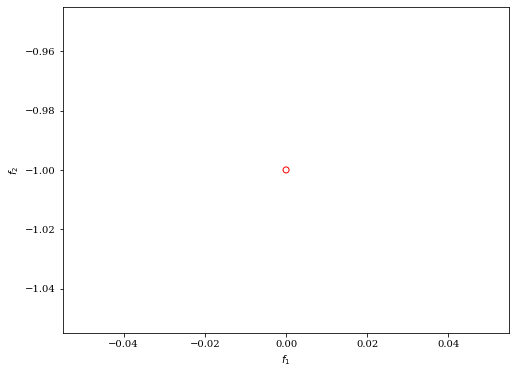

In [148]:
class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         xl=anp.array([-2, -2]),
                         xu=anp.array([2, 2]))

    def _evaluate(self, X, out, *args, **kwargs):
        print(X)
        f1=X[:, 0]**2 + X[:, 1]**2
        f2=(X[:, 0]-1) + X[:, 1]**2
        g1=2*(X[:, 0]-0.1) + (X[:, 1]-0.9) / 0.18
        g2=-20*(X[:, 0]-0.4) + (X[:, 1]-0.6) /4.8
        out["F"] = anp.column_stack([f1, f2])
        out["G"] = anp.column_stack([g1, g2,])
        print("out[""].................................")
        print(out["G"])

algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("bin_random"),
                  crossover=get_crossover("bin_two_point"),
                  mutation=get_mutation("bin_bitflip"),
                  eliminate_duplicates=True)

res = minimize(MyProblem(),
               algorithm,
               ('n_gen', 500),
               seed=12,
               verbose=False)

print(MyProblem())
print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))
plot = Scatter()
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [258]:
class MyProblem1(Problem):

    def __init__(self):
        super().__init__(n_var=100,
                         n_obj=3,
                         n_constr=0,
                         xl=anp.array([-1]*100),
                         xu=anp.array([2]*100))
  
    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 1 - np.exp(-((x - 1 / np.sqrt(self.n_var)) ** 2).sum(axis=1))
        f2 = 1 - np.exp(-((x + 1 / np.sqrt(self.n_var)) ** 2).sum(axis=1))
        out["F"] = np.column_stack([f1, f2])
        out["G"] = np.column_stack([f1, f2])

            

In [256]:
class MyProblem2(Problem):
    def __init__(self):
        super().__init__(n_var=3,
                         n_obj=2,
                         n_constr=0,
                         xl=np.array([-2.0, -2.0, -2.0]),
                         xu=np.array([2.0, 2.0, 2.0]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 1 - np.exp(-((x - 1 / np.sqrt(self.n_var)) ** 2).sum(axis=1))
        f2 = 1 - np.exp(-((x + 1 / np.sqrt(self.n_var)) ** 2).sum(axis=1))
        print("out")
        print(out)
        out["F"] = np.column_stack([f1, f2])


In [259]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.factory import get_problem
from pymoo.optimize import minimize

print("MyProblem11111111111111111111111111111111()")
print(MyProblem1())
print("MyProblem2222222222222222()")
print(MyProblem1())

algorithm = NSGA2(
    pop_size=1,
    eliminate_duplicates=True)

res = minimize(MyProblem1(),
               algorithm,
               seed=200,
               verbose=False)

MyProblem11111111111111111111111111111111()
# name: MyProblem1
# n_var: 100
# n_obj: 3
# n_constr: 0

MyProblem2222222222222222()
# name: MyProblem1
# n_var: 100
# n_obj: 3
# n_constr: 0



In [233]:
print("Best solution found: \nX = %s\nF = %s \nG = %s" % (res.X, res.F, res.G))
print("len(res.X)...............................")
print(len(res.X))
for x in res.X:
    print(len(x))

Best solution found: 
X = [[ 1.84289677e+00 -1.38008450e-01  7.83260433e-01  2.84926055e-01
   1.29242206e+00 -9.91418225e-01  7.22710439e-02  1.76409240e+00
   3.68242956e-01  1.94540813e+00  1.97664449e+00  1.95808253e+00
   1.76980012e+00 -9.79218863e-02  1.53831047e+00 -6.36334095e-01
   1.35672886e+00 -2.48484836e-01 -7.11910870e-01  1.83047311e+00
   1.39030600e+00  1.01759444e+00  1.51055452e+00  7.35127070e-01
   3.50253513e-01  1.04047094e+00  2.58276864e-01  9.21180393e-01
   8.25968876e-01 -6.83697678e-01  1.73881234e+00  1.27610124e+00
   1.03892550e+00 -1.19556886e-02 -9.20635351e-01  1.41098116e+00
   1.91848757e+00 -1.51185656e-01  9.47224019e-01 -4.65981155e-02
  -4.36932574e-01  2.57143620e-01  9.97996703e-01  6.61862821e-01
   1.56347756e+00 -4.86966074e-01  1.93447555e+00 -9.62088290e-02
  -3.02652718e-01  1.45161499e+00  1.83443184e+00  1.96189560e+00
  -9.51809169e-01 -6.79847722e-01  9.36676601e-01  5.20831893e-01
  -3.69013749e-01 -1.90438522e-04 -9.80976745e-01 

In [182]:
print(len(res.F))

100


# pymoo with constraint 

In [280]:
class MyProblem3(Problem):

    def __init__(self):
        super().__init__(n_var=2, n_obj=1, n_constr=1, xl=0, xu=10)

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = - np.min(x * [3, 1], axis=1)
        out["G"] = x[:, 0] + x[:, 1] - 10

In [281]:
import numpy as np

from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.factory import get_crossover, get_mutation, get_sampling
from pymoo.optimize import minimize

problem = MyProblem3()

algorithm = GA(
    pop_size=20,
    sampling=sampling,
    crossover=crossover,
    mutation=mutation,
    eliminate_duplicates=True,
)

res = minimize(
    problem,
    algorithm,
    ('n_gen', 200),
    seed=1,
    save_history=True
)

print("Best solution found: %s" % res.X)
print("Function value: %s" % res.F)
print("Constraint violation: %s" % res.CV)

Best solution found: [3 6.993302064728985]
Function value: [-6.99330206]
Constraint violation: [0.]
